## Final Project Submission

Please fill out:
* Student name: Wilfred Lekishorumongi
* Student pace: part time 
* Scheduled project review date/time: 09/11/2022 - 11:59PM
* Instructor name: Mr.NOAH KANDIE
* Blog post URL:


Working for the data insights that will be used by Microsoft, I have decided to take a look at the files zipped and import for my analysis. 

### Business Problem

Microsoft wants to compete within the digital content market in creating original video content.
They now need to establish their own movie studio for this purpose and favorably compete in the market with other companies doing the same. 

To solve this, I will be seeking to determine the following aspects:
1. The best performing genres in the market considering grossing earnings and audience ratings
2. The movies produced for each genre
3. well paying genres with the highest earnings. 


In [1]:
# To check into the zipped folder to establish kind of datasets inside
# Importing importing libraries
 
import json
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

For this project I will use the following 3 datasets for my analysis; the movie database, IMDb and Box Office Mojo.

In [2]:
# Importing the three sets of data and converting them into dataFrames 

#import data from movie database
movie_db = pd.read_csv("tmdb.movies.csv", index_col=0)

# importing the basics and ratings data from IMDb database
IMDb_basics = pd.read_csv("title.basics.csv")
IMDb_ratings = pd.read_csv("title.ratings.csv")

#importing gross earnings data from Box Office Mojo.

BoM_gross = pd.read_csv("bom.movie_gross.csv")

#### Taking a look on how the data available for me in each dataset looks like

In [3]:
movie_db.head(1)


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [4]:
IMDb_basics.head(1)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"


In [5]:
IMDb_ratings.head(5)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
BoM_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
#checking NaN values in the table
BoM_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB



### Removing unnecessary with missing values 
Since foreign_gross has more NaN values, I will drop the entire column since 
domestic_gross will serve to offer same insight 
on the successful genre based on earnings. Also shall drop the studio column because it is irrelevant to solving the business problem.

In [8]:
BoM_gross = BoM_gross.drop( columns = ["foreign_gross","studio"])
BoM_gross.head(3)

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010


In [9]:
#renaming column year to be start_year to be same as the other sets
BoM_gross.rename(columns={"year" : "start_year"}, inplace = True)
BoM_gross

,title,domestic_gross,start_year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010
...,...,...,...
3382,The Quake,6200.0,2018
3383,Edward II (2018 re-release),4800.0,2018
3384,El Pacto,2500.0,2018
3385,The Swan,2400.0,2018


In [10]:
# Since we imported two tables for IMDb, 
#for ratings and basics we join them together

IMDb_joined = IMDb_basics.join(IMDb_ratings.set_index('tconst'),
                                   how = 'inner', on = 'tconst', rsuffix = 'r')

In [11]:
IMDb_joined.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


### Dropping duplicated columns.
Drop the ‘original_title’ since its the original title in its original language and its the same as the primary title.


In [12]:
IMDb_joined = IMDb_joined.drop(columns = ['original_title'])
IMDb_joined.head(3)

,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [13]:
#dropping the ‘runtime_minutes’, and ‘numvotes’ columns from IMDb file
#since they do not help to answer the business questions

IMDb_joined = IMDb_joined.drop(columns = ['runtime_minutes', 'numvotes'])

In [14]:
#checking the new table
IMDb_joined.head(2)

,tconst,primary_title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2


In [15]:
#rename the "primary_title" column to match 
#other two data files with the column name "title" that we are using.
#
IMDb_joined.rename(columns = {'primary_title':'title'}, inplace = True)

In [16]:
IMDb_joined.head(1)

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0


In [31]:
#checking and dropping all NaN values in all the files 
#and also dealing with the title columns in both files.

movie_db.head(2)
# There is original_title which is the same as title.  

,release_date,title,averagerating
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,2010-03-26,How to Train Your Dragon,7.7


Dropping the original_title since its the same as the  title,and original_language from movie_db since they do not help in tackling the business problem.

In [18]:
# Droping "original_language" and "original_title" columns
movie_db = movie_db.drop(columns=["original_language", "original_title"])
movie_db.head(1)

,genre_ids,id,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


Only relevant columns to the business problem are: release_date,title of the movie,vote_average for rating.
Therefore I remove the other columns and change release date to start_year.

In [19]:
movie_db = movie_db.drop(columns=["genre_ids", "id", "popularity", "vote_count"])
movie_db

,release_date,title,vote_average
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,2010-03-26,How to Train Your Dragon,7.7
2,2010-05-07,Iron Man 2,6.8
3,1995-11-22,Toy Story,7.9
4,2010-07-16,Inception,8.3
...,...,...,...
26512,2018-10-13,Laboratory Conditions,0.0
26513,2018-05-01,_EXHIBIT_84xxx_,0.0
26514,2018-10-01,The Last One,0.0
26515,2018-06-22,Trailer Made,0.0


Average Ratings:

For the average ratings which is very important for our final analysis,since its appearing in two datasets I have come up with a standard variable to match them so as I will be able to arrive at one standard name for analysis.
 

In [20]:
movie_db.rename(columns={"vote_average" : "averagerating"}, inplace = True)
movie_db

,release_date,title,averagerating
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7
1,2010-03-26,How to Train Your Dragon,7.7
2,2010-05-07,Iron Man 2,6.8
3,1995-11-22,Toy Story,7.9
4,2010-07-16,Inception,8.3
...,...,...,...
26512,2018-10-13,Laboratory Conditions,0.0
26513,2018-05-01,_EXHIBIT_84xxx_,0.0
26514,2018-10-01,The Last One,0.0
26515,2018-06-22,Trailer Made,0.0


Dealing with specific files data, I want to get specific genre values.
Therefore I will first create a dataframe with count of movies per genre

In [21]:
IMDb_joined.head()

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [22]:
#Merging the IMDb_joined table Movie db tables

BoM_Movies = BoM_gross.join(movie_db.set_index('title'),
                                   how = 'inner', on = 'title', rsuffix = 'r')

In [23]:
BoM_Movies

,title,domestic_gross,start_year,release_date,averagerating
0,Toy Story 3,415000000.0,2010,2010-06-17,7.7
3,Inception,292600000.0,2010,2010-07-16,8.3
4,Shrek Forever After,238700000.0,2010,2010-05-16,6.1
5,The Twilight Saga: Eclipse,300500000.0,2010,2010-06-23,6.0
6,Iron Man 2,312400000.0,2010,2010-05-07,6.8
...,...,...,...,...,...
3374,The Escape,14000.0,2018,2015-08-14,7.0
3374,The Escape,14000.0,2018,2016-10-23,6.6
3379,Souvenir,11400.0,2018,2016-09-08,5.8
3382,The Quake,6200.0,2018,2018-12-14,6.7


In [24]:
BoM_Movies.drop(columns = ["release_date"]).head(3)

,title,domestic_gross,start_year,averagerating
0,Toy Story 3,415000000.0,2010,7.7
3,Inception,292600000.0,2010,8.3
4,Shrek Forever After,238700000.0,2010,6.1


In [25]:
# Creating a smaller dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 27.9mil
movies_df = BoM_Movies[(BoM_Movies['averagerating'] >= 7) &
                        (BoM_Movies['domestic_gross'] >= 310000000.0) &
                        (BoM_Movies['start_year'] > 2012)]

In [26]:
movies_df

,title,domestic_gross,start_year,release_date,averagerating
1127,Frozen,400700000.0,2013,2013-11-27,7.3
1131,The Hunger Games: Catching Fire,424700000.0,2013,2013-11-22,7.4
1479,Guardians of the Galaxy,333200000.0,2014,2014-08-01,7.9
1489,American Sniper,350100000.0,2014,2014-12-25,7.4
1489,American Sniper,350100000.0,2014,2014-12-25,7.4
1872,Star Wars: The Force Awakens,936700000.0,2015,2015-12-18,7.4
1872,Star Wars: The Force Awakens,936700000.0,2015,2015-12-18,7.4
1874,Furious 7,353000000.0,2015,2015-04-03,7.3
1875,Avengers: Age of Ultron,459000000.0,2015,2015-05-01,7.3
1878,Inside Out,356500000.0,2015,2015-06-19,8.0


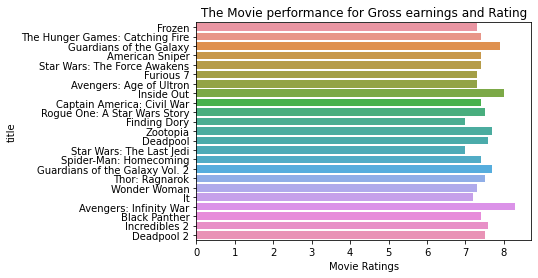

In [27]:
import seaborn as sns

bar_chart_title = "The Movie performance for Gross earnings and Rating"

fig, ax = plt.subplots()

# your code here
sns.barplot(x= movies_df["averagerating"],
            y = movies_df["title"])
plt.xlabel("Movie Ratings")
plt.title(bar_chart_title)
plt.show()

In [28]:
#Removing dublicates so as to analysis 
movies_df.drop_duplicates()

,title,domestic_gross,start_year,release_date,averagerating
1127,Frozen,400700000.0,2013,2013-11-27,7.3
1131,The Hunger Games: Catching Fire,424700000.0,2013,2013-11-22,7.4
1479,Guardians of the Galaxy,333200000.0,2014,2014-08-01,7.9
1489,American Sniper,350100000.0,2014,2014-12-25,7.4
1872,Star Wars: The Force Awakens,936700000.0,2015,2015-12-18,7.4
1874,Furious 7,353000000.0,2015,2015-04-03,7.3
1875,Avengers: Age of Ultron,459000000.0,2015,2015-05-01,7.3
1878,Inside Out,356500000.0,2015,2015-06-19,8.0
2322,Captain America: Civil War,408100000.0,2016,2016-05-06,7.4
2323,Rogue One: A Star Wars Story,532200000.0,2016,2016-12-16,7.5


### Ploting Line Chart of movies titles against the domestic gross and average rating.

In [29]:
import matplotlib.pyplot as plt

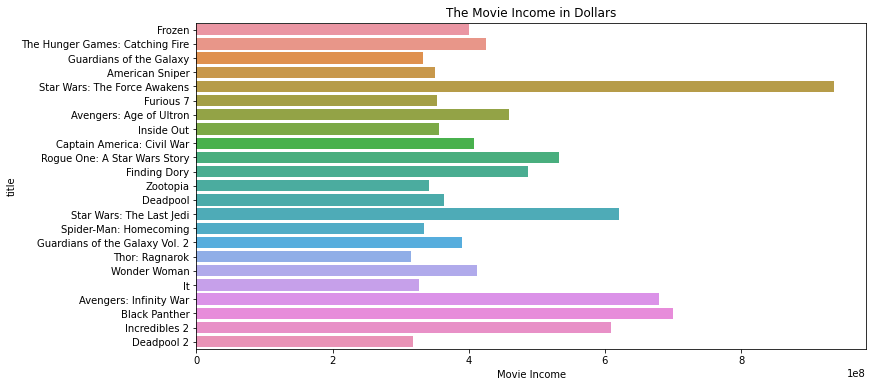

In [30]:
import seaborn as sns

bar_chart_title = "The Movie Income in Dollars"

fig, ax = plt.subplots(figsize= (12,6))

# your code here
sns.barplot(x= movies_df["domestic_gross"],
            y = movies_df["title"])
plt.xlabel("Movie Income")
plt.title(bar_chart_title)

plt.show()

The movies with high gross domestic income in the market and trended within a short period of release;

1. Star Wars: The Force Awakens
2. Black Panther
3. Avengers: Infinity War

In [423]:
IMDb_joined.head()

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,2018,Drama,6.9
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5


In [424]:
 # split the genre column for analysis
IMDb_joined = IMDb_joined.assign(genres = IMDb_joined['genres'].str.split(',')).explode('genres')
IMDb_joined

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,Action,7.0
0,tt0063540,Sunghursh,2013,Crime,7.0
0,tt0063540,Sunghursh,2013,Drama,7.0
1,tt0066787,One Day Before the Rainy Season,2019,Biography,7.2
1,tt0066787,One Day Before the Rainy Season,2019,Drama,7.2
...,...,...,...,...,...
146122,tt9914286,Sokagin Çocuklari,2019,Drama,8.7
146122,tt9914286,Sokagin Çocuklari,2019,Family,8.7
146125,tt9914642,Albatross,2017,Documentary,8.5
146129,tt9914942,La vida sense la Sara Amat,2019,NaN,6.6


In [425]:
movies_df.head(2)

,title,domestic_gross,start_year,release_date,averagerating
1127,Frozen,400700000.0,2013,2013-11-27,7.3
1131,The Hunger Games: Catching Fire,424700000.0,2013,2013-11-22,7.4


In [426]:
#movies_df.drop(columns = ["title", "start_year"])


del movies_df["title"]
del movies_df["start_year"]
movies_df.head(1)

,domestic_gross,release_date,averagerating
1127,400700000.0,2013-11-27,7.3


In [427]:
 IMDb_joined.head(1)

,tconst,title,start_year,genres,averagerating
0,tt0063540,Sunghursh,2013,Action,7.0


In [428]:
#Merging the IMDb_joined and movies_df so as to compare various genres against other parameters

IMDb_Moviesdf = IMDb_joined.join(movies_df.set_index('averagerating'),
                                   how = 'inner', on = 'averagerating', rsuffix = 'r')

In [452]:
IMDb_Moviesdf

,tconst,title,start_year,genres,averagerating,domestic_gross,release_date
0,tt0063540,Sunghursh,2013,Action,7.0,486300000.0,2016-06-17
0,tt0063540,Sunghursh,2013,Action,7.0,620200000.0,2017-12-15
0,tt0063540,Sunghursh,2013,Action,7.0,620200000.0,2017-12-15
0,tt0063540,Sunghursh,2013,Crime,7.0,486300000.0,2016-06-17
0,tt0063540,Sunghursh,2013,Crime,7.0,620200000.0,2017-12-15
...,...,...,...,...,...,...,...
145703,tt9856680,Puffs: Filmed Live Off Broadway,2018,Adventure,7.7,389800000.0,2017-05-05
145703,tt9856680,Puffs: Filmed Live Off Broadway,2018,Comedy,7.7,341300000.0,2016-03-04
145703,tt9856680,Puffs: Filmed Live Off Broadway,2018,Comedy,7.7,389800000.0,2017-05-05
145737,tt9861522,Ali,2019,Drama,7.7,341300000.0,2016-03-04


In [430]:
IMDb_Moviesdf.drop_duplicates().tail(20)

,tconst,title,start_year,genres,averagerating,domestic_gross,release_date
145173,tt9780140,Qissat Hubb,2019,Romance,7.7,341300000.0,2016-03-04
145173,tt9780140,Qissat Hubb,2019,Romance,7.7,389800000.0,2017-05-05
145472,tt9822474,Into the Canyon,2019,Documentary,7.7,341300000.0,2016-03-04
145472,tt9822474,Into the Canyon,2019,Documentary,7.7,389800000.0,2017-05-05
145504,tt9827784,Farewell Song,2019,Music,7.7,341300000.0,2016-03-04
145504,tt9827784,Farewell Song,2019,Music,7.7,389800000.0,2017-05-05
145504,tt9827784,Farewell Song,2019,Romance,7.7,341300000.0,2016-03-04
145504,tt9827784,Farewell Song,2019,Romance,7.7,389800000.0,2017-05-05
145640,tt9848968,Same But Different: A True New Zealand Love Story,2019,Comedy,7.7,341300000.0,2016-03-04
145640,tt9848968,Same But Different: A True New Zealand Love Story,2019,Comedy,7.7,389800000.0,2017-05-05


In [431]:
# Creating a smaller dataframe of movies with at least a rating of 7.0 and grossed earnings of at least 27.9mil
Small_IMDb_Moviesdf = IMDb_Moviesdf[(IMDb_Moviesdf['averagerating'] >= 7.5) &
                        (IMDb_Moviesdf['domestic_gross'] >= 450000000.0) &
                        (IMDb_Moviesdf['start_year'] > 2013)]

In [432]:
Small_IMDb_Moviesdf

,tconst,title,start_year,genres,averagerating,domestic_gross,release_date
94,tt0427543,A Million Little Pieces,2018,Drama,7.6,608600000.0,2018-06-15
880,tt10050766,Brené Brown: The Call to Courage,2019,Documentary,7.6,608600000.0,2018-06-15
880,tt10050766,Brené Brown: The Call to Courage,2019,Drama,7.6,608600000.0,2018-06-15
900,tt10055770,Vellai Pookal,2019,Thriller,7.6,608600000.0,2018-06-15
964,tt10066526,Mantan Manten,2019,Drama,7.6,608600000.0,2018-06-15
...,...,...,...,...,...,...,...
144026,tt9617560,The Wall of Mexico,2019,Comedy,8.3,678800000.0,2018-04-27
144026,tt9617560,The Wall of Mexico,2019,Drama,8.3,678800000.0,2018-04-27
145251,tt9789404,Gateways to New York: Othmar H. Ammann and his...,2019,Documentary,8.3,678800000.0,2018-04-27
145520,tt9829092,Inocencia,2018,Drama,8.3,678800000.0,2018-04-27


In [455]:
Best_Genres = Small_IMDb_Moviesdf.sort_values(by=['domestic_gross']).tail(10)
Best_Genres

,tconst,title,start_year,genres,averagerating,domestic_gross,release_date
70878,tt4054936,Kaul,2016,Drama,8.3,678800000.0,2018-04-27
70878,tt4054936,Kaul,2016,Mystery,8.3,678800000.0,2018-04-27
70878,tt4054936,Kaul,2016,Thriller,8.3,678800000.0,2018-04-27
70888,tt4056422,Blaxploitalian,2016,Documentary,8.3,678800000.0,2018-04-27
70888,tt4056422,Blaxploitalian,2016,History,8.3,678800000.0,2018-04-27
70909,tt4057246,38,2014,Biography,8.3,678800000.0,2018-04-27
70909,tt4057246,38,2014,Documentary,8.3,678800000.0,2018-04-27
70909,tt4057246,38,2014,Sport,8.3,678800000.0,2018-04-27
70587,tt4036336,Imperfect Sky,2015,Drama,8.3,678800000.0,2018-04-27
145638,tt9848724,Akra,2019,Documentary,8.3,678800000.0,2018-04-27
